In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

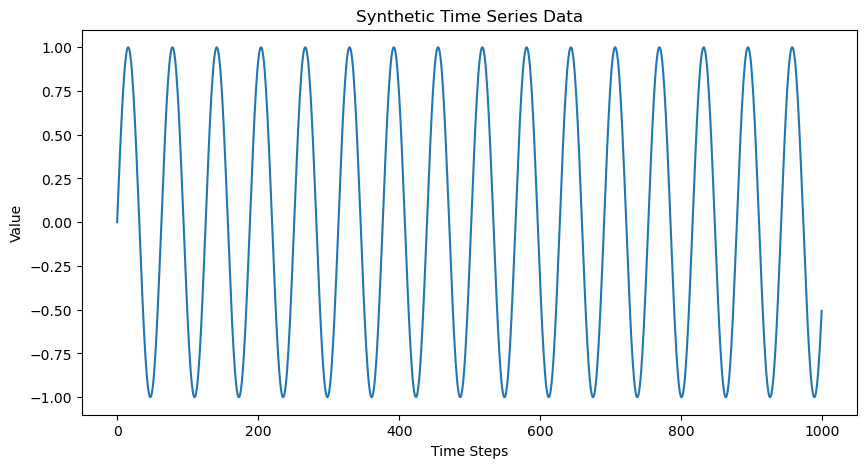

In [2]:
# Generate Synthetic Data
# Generate a sine wave for demonstration
time_steps = np.linspace(0, 100, 1000)
data = np.sin(time_steps)

# Create a DataFrame
df = pd.DataFrame(data, columns=['Value'])

# Plot the data
plt.figure(figsize=(10, 5))
plt.plot(df['Value'])
plt.title('Synthetic Time Series Data')
plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.show()


In [3]:
# Prepare the Data
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        a = data[i:(i + time_step), 0]
        X.append(a)
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df['Value'].values.reshape(-1, 1))

# Define time step
time_step = 10
X, y = create_dataset(scaled_data, time_step)

# Reshape input to be [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

In [4]:
# Build the RNN Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [5]:
# Train the Model
model.fit(X, y, batch_size=32, epochs=100)

Epoch 1/100
31/31 [==============================] - 5s 15ms/step - loss: 0.1022
Epoch 2/100
31/31 [==============================] - 0s 15ms/step - loss: 0.0356
Epoch 3/100
31/31 [==============================] - 0s 15ms/step - loss: 0.0276
Epoch 4/100
31/31 [==============================] - 0s 15ms/step - loss: 0.0179
Epoch 5/100
31/31 [==============================] - 0s 15ms/step - loss: 0.0033
Epoch 6/100
31/31 [==============================] - 0s 15ms/step - loss: 7.5755e-04
Epoch 7/100
31/31 [==============================] - 0s 15ms/step - loss: 3.8181e-04
Epoch 8/100
31/31 [==============================] - 0s 15ms/step - loss: 1.7606e-04
Epoch 9/100
31/31 [==============================] - 0s 15ms/step - loss: 1.1007e-04
Epoch 10/100
31/31 [==============================] - 0s 16ms/step - loss: 8.0694e-05
Epoch 11/100
31/31 [==============================] - 0s 15ms/step - loss: 9.3432e-05
Epoch 12/100
31/31 [==============================] - 0s 15ms/step - loss: 1.2643e-

31/31 [==============================] - 1s 6ms/step


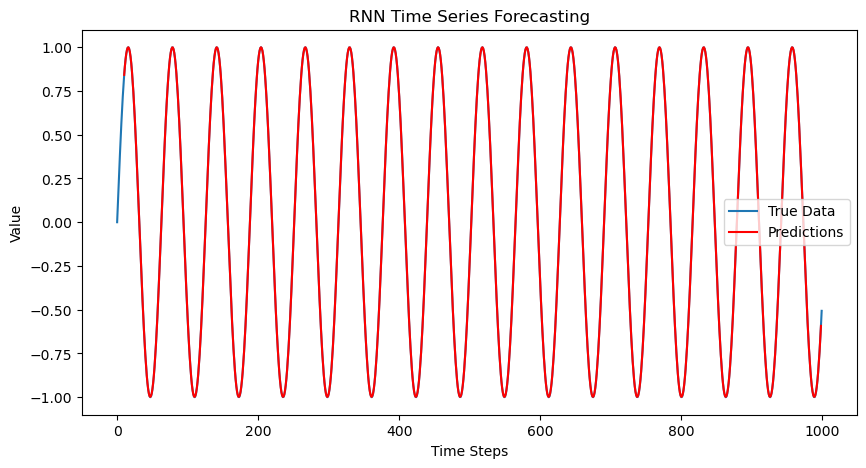

In [6]:
# Generate predictions
train_predict = model.predict(X)

# Inverse transform the predictions
train_predict = scaler.inverse_transform(train_predict)

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(df['Value'], label='True Data')
plt.plot(np.arange(time_step, time_step + len(train_predict)), train_predict, label='Predictions', color='red')
plt.title('RNN Time Series Forecasting')
plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.legend()
plt.show()

In [8]:
# Evaluate the Model
# Inverse transform the actual values for comparison
actual_values = scaler.inverse_transform(scaled_data[time_step + 1:])

# Calculate RMSE
train_rmse = np.sqrt(np.mean((train_predict - actual_values) ** 2))
print(f'Train RMSE: {train_rmse}')

Train RMSE: 0.07047846136229381


In [11]:
# save the model
model.save('RNN_time_serires_forecasting.h5')